In [74]:
#############
###paths#####
#############
import sys
import os

pwd = os.getcwd()
modellingpath = pwd.rpartition("modelling")[0] + pwd.rpartition("modelling")[1] 
modellingephemeral = '/rds/general/ephemeral/user/mo2016/ephemeral/Documents/modelling'
sys.path.append(modellingpath + '/lib')
#############
import numpy as np
import pickle as pkl
import matplotlib.pyplot as plt
import seaborn as sns


In [62]:
#fit 
pfitDict = {'Vc': 99.99999998437673,
 'Vd': 8.845204237579598,
 'Ve': 99.99999902098732,
 'Vf': 8.394996554940189,
 'Kvd': 0.9400832873750722,
 'Kda': 4.142114110177617,
 'Kce': 4.342277899710668,
 'Kfe': 0.4319218458202641}
pfit =np.array(list(pfitDict.values()),dtype=np.float64)

#turing dist
circuit_n=14;variant='2nd';n_species=6;nsamples=1000000
folder = 'circuit14variant2ndBalancedTuring'
with open(modellingpath + '/3954/paper/out/analytical/lsa_dataframes/turing_dataframes/turing_df_circuit%s_variant%s_%sparametersets_balanced.pkl'%(circuit_n,variant,nsamples), "rb" ) as f:
   turingDf = pkl.load(f)

pfitDict.keys()
turingDf = turingDf[pfitDict.keys()]

turingNp = turingDf.to_numpy(dtype=np.float64)
turingNp

array([[389.84872529, 281.33679725, 106.70254044, ...,   1.18936236,
        123.89592471,   1.72054453],
       [980.31775253,  80.78139434, 148.06892542, ...,   2.78607558,
        627.30937219,  18.69904437],
       [285.65550005, 131.49383227,  24.99698704, ...,   8.56802471,
        102.21958887,   2.98098403],
       ...,
       [876.68531004, 508.93776461, 214.45373995, ...,  41.31523235,
         57.55992599,   5.33134197],
       [ 47.39241511,  47.65182349,  86.46724404, ...,   4.8666555 ,
         39.88439868,  36.97755368],
       [ 11.53257502,  44.12903935, 192.22265424, ...,   1.87499241,
          4.72001854,   8.27786836]])

## Mahanohabis distance 

[389.84872529 281.33679725 106.70254044  91.26050492  17.46997511
   1.18936236 123.89592471   1.72054453]
(8, 8)


<AxesSubplot: ylabel='Count'>

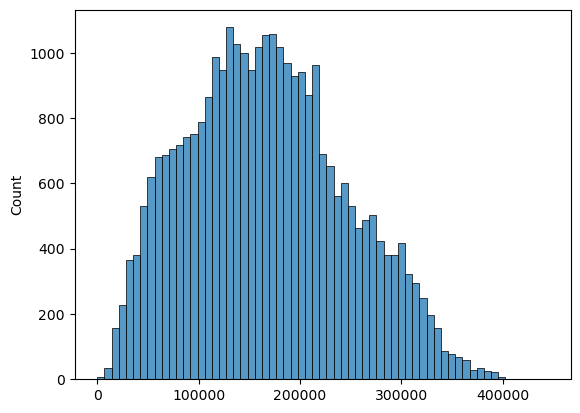

In [75]:
#calculate mahanohabis distance for each parameter set to fit
from scipy.spatial.distance import mahalanobis
print(turingNp[0])
#calculate covariance matrix
# cov = turingDf[pfitDict.keys()].cov()
cov = np.cov(turingNp.T)
print(cov.shape)
mahalanobisTuring = []
for n1 in range(len(turingDf)):
    for n2 in range(len(turingDf)):
        if n1!=n2:
            mahalanobisTuring.append(mahalanobis(turingNp[n1], turingNp[n2], VI=cov))
mahalanobisFit = []
for n in range(len(turingDf)):
    mahalanobisFit.append(mahalanobis(turingNp[n], pfit, VI=cov))

sns.histplot(mahalanobisTuring)
sns.histplot()
#     mahalanobisTuring.append()
# print(mahalanobis(turingNp[0], pfit, VI=cov))
# print(mahalanobis(turingNp[1], pfit, VI=cov))
# print(mahalanobis(pfit, pfit, VI=cov))
# print(mahalanobis(turingNp[1], turingNp[2], VI=cov))


In [12]:
turingDf.columns

Index(['Vc', 'Vd', 'Ve', 'Vf', 'Kvd', 'Kda', 'Kce', 'Kfe'], dtype='object')